In [17]:
import pandas as pd
import urllib, json
import itertools
import collections
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [8]:
!pip install arrow
!pip install dload

In [21]:
import arrow
import dload
matplotlib.rcParams['figure.figsize'] = (15, 3)

In [11]:
log =dload.json('https://raw.githubusercontent.com/BETOXL/gitloggraph/gh-pages/loggit.json')
print(log[40])

{'refs': [], 'hash': '2adb2e303aa83361c4489d791b707c68ac6880c5', 'hashAbbrev': '2adb2e3', 'tree': '962d86a4e7c7707debec45c52eb4a19155faea0c', 'treeAbbrev': '962d86a', 'parents': ['5ad22e6231366592d3e16b3347478ada8c15a54b'], 'parentsAbbrev': ['5ad22e6'], 'author': {'name': 'Juxant', 'email': 'juancruzfiant@hotmail.com', 'timestamp': 1566856592000}, 'committer': {'name': 'Juxant', 'email': 'juancruzfiant@hotmail.com', 'timestamp': 1566856592000}, 'subject': 'fix reporte deudores', 'body': '', 'notes': '', 'stats': [{'additions': 1, 'deletions': 1, 'file': 'src/Controller/CustomReportesDiariosController.php'}, {'additions': 7, 'deletions': 1, 'file': 'templates/default/pdfRepoDeudores.html.twig'}]}


In [12]:
print("Numero de Registro de Commits = ", len(log))

Numero de Registro de Commits =  562


In [14]:
file_changes = lambda: itertools.chain.from_iterable(
  [change['file'] for change in commitB['stats'] ]
  for commitB in log
)
file_changes()


Counter({'src/Controller/CustomCobroCRUDController.php': 71, 'src/Controller/CustomCobroNSCRUDController.php': 69, 'config/packages/sonata_admin.yaml': 68, 'config/services.yaml': 57, 'templates/default/cobroView.html.twig': 53, 'Socios.dia': 49, 'templates/default/cobroNSView.html.twig': 48, 'templates/default/ticket.html.twig': 45, 'src/Admin/DatoBasicoSocioAdmin.php': 38, 'public/assets/phyton/genRecibos.py': 33, 'src/Controller/CustomCierreDeCajaDiarioController.php': 33, 'src/Controller/CustomCobroAdelantadoController.php': 31, 'src/Entity/DatoBasicoSocio.php': 27, 'templates/default/ticketSocio.html.twig': 25, 'src/Entity/Recibo.php': 22, 'src/Admin/AltasDisciplinasAdmin.php': 21, 'clubadmin.sql': 21, 'src/Controller/CustomCrearReciboOficialController.php': 20, 'Socios.dia.autosave': 20, 'templates/default/cierreDeCajaView.html.twig': 19, 'src/Controller/CustomPlanDePagoController.php': 18, 'Socios.dia~': 18, 'templates/default/reciboOficial.html.twig': 17, 'templates/default/cob

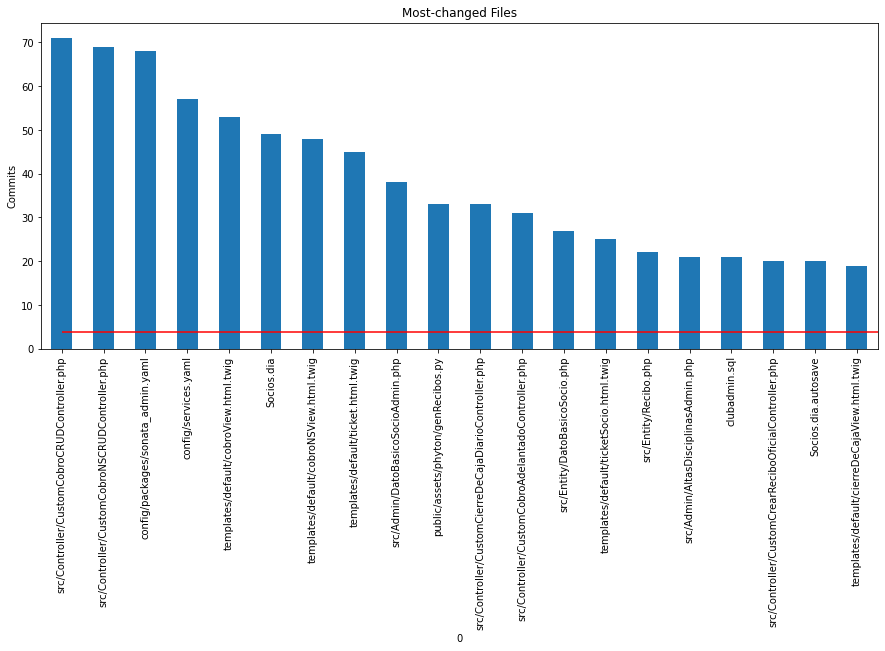

In [15]:
# Python program to get average of a list 
def Average(lst): 
    return sum(lst) / len(lst) 
matplotlib.rcParams['figure.figsize'] = (15, 6)
fchanges = file_changes()
fchange_count = collections.Counter(fchanges)
print (fchange_count)
most_common = fchange_count.most_common(20)
a = Average(fchange_count.values())
df = pd.DataFrame(most_common)
df.head()
df.index = df[0]
df = df[[1]]
df.head()
p = df.plot(kind='bar', legend=False)
p.set_title('Most-changed Files')
p.set_ylabel('Commits')
# Draw a red line at the average
plt.hlines(a, 0, len(df), colors='r') 

# **Howing weekly commit counts over time**

In [35]:
def weekly_date_resolution(ts):
    ar = arrow.get(ts)
    day_of_month = ar.timetuple().tm_mday
    week = int(int(day_of_month) / 7)
    new_day = int((week*7)+1)
    assert new_day > 0
    assert new_day < 30
    try:
        day_adjusted = ar.replace(day=new_day)
    except ValueError:
        new_day = day_of_month # just keep the original
        day_adjusted = ar.replace(day=new_day)
    return day_adjusted.date()

commit_times = lambda: (
    (weekly_date_resolution(commit['committer']['timestamp']), commit['subject'])
    for commit in log
)
dfct = pd.DataFrame(list(commit_times()), columns=['date', 'id'])
dfct = dfct.groupby('date').aggregate(len)
dfct.head()

,id
date,
2018-10-01,1
2018-10-08,13
2018-10-15,12
2018-10-22,10
2018-10-29,8


Text(0, 0.5, 'Commits')

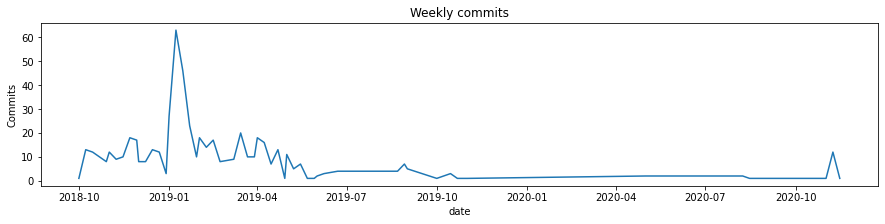

In [29]:
p = dfct.plot(legend=False)
p.set_title('Weekly commits')
p.set_ylabel('Commits')

In [45]:
commit_user = lambda: (
    ((commit['committer']['email']), commit['subject'])
    for commit in log
)
dfca = pd.DataFrame(list(commit_user()), columns=['user', 'count'])
dfcu = dfca.groupby('user').aggregate(len)
dfcu.head()

,count
user,
89rael@gmail.com,142
juancruzfiant@hotmail.com,6
lucasg.fiedorowicz@gmail.com,8
ramirezleonel0@gmail.com,9
roblo53@hotmail.com,397


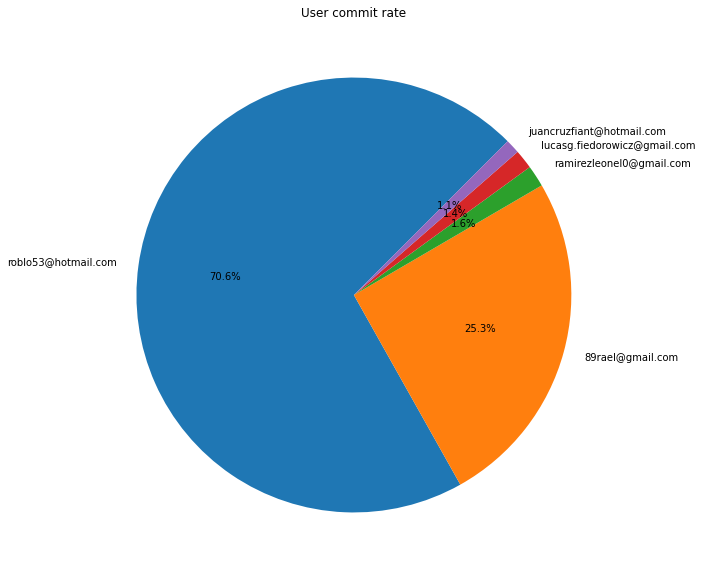

In [48]:
data_pie = dfca['user'].value_counts().rename_axis('user').reset_index(name='user_count')
plt.figure(figsize=(10,10))
plt.pie(data_pie.user_count, labels=data_pie.user, startangle=45, autopct='%.1f%%')
plt.title('User commit rate')
plt.show()